In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score , ConfusionMatrixDisplay
import time

## EDA

In [2]:
df = pd.read_csv('Video_games_esrb_rating.csv')

In [3]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
console,1895.0,0.475462,0.499529,0.0,0.0,0.0,1.0,1.0
alcohol_reference,1895.0,0.050132,0.218275,0.0,0.0,0.0,0.0,1.0
animated_blood,1895.0,0.010026,0.099655,0.0,0.0,0.0,0.0,1.0
blood,1895.0,0.227968,0.419633,0.0,0.0,0.0,0.0,1.0
blood_and_gore,1895.0,0.126121,0.332074,0.0,0.0,0.0,0.0,1.0
cartoon_violence,1895.0,0.019525,0.138398,0.0,0.0,0.0,0.0,1.0
crude_humor,1895.0,0.054354,0.226774,0.0,0.0,0.0,0.0,1.0
drug_reference,1895.0,0.034828,0.183394,0.0,0.0,0.0,0.0,1.0
fantasy_violence,1895.0,0.220580,0.414748,0.0,0.0,0.0,0.0,1.0
intense_violence,1895.0,0.118206,0.322937,0.0,0.0,0.0,0.0,1.0


In [6]:
df.describe(include=object)

,title,esrb_rating
count,1895,1895
unique,1895,4
top,Monster Jam Steel Titans 2,T
freq,1,689


In [7]:
df.shape

(1895, 34)

In [8]:
df.isna().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [9]:
df.drop('title' , axis =1 , inplace=True)

## The count of each ESRB Rating 

<AxesSubplot:xlabel='esrb_rating', ylabel='count'>

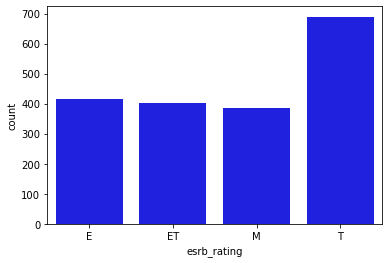

In [10]:
sns.countplot(data = df , x='esrb_rating' , color='blue' )

## Check if the blood effect the ESRB Rating

<AxesSubplot:xlabel='blood', ylabel='count'>

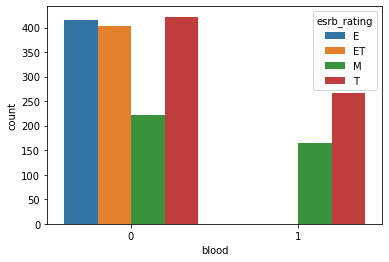

In [11]:
sns.countplot(data=df,x='blood',hue='esrb_rating')

## How many games played on a console

<AxesSubplot:xlabel='console', ylabel='count'>

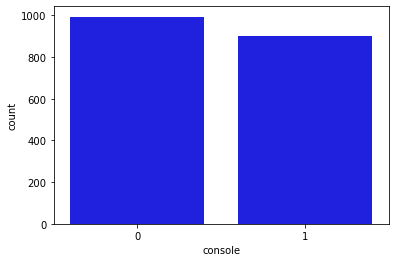

In [12]:
sns.countplot(data=df,x='console' , color = 'blue')

## Top 3 contents that each ESRB Rating have

In [13]:
tmp = df.groupby('esrb_rating' ).sum()
tmp.describe().T.sort_values('max' , ascending=False)

,count,mean,std,min,25%,50%,75%,max
console,4.0,225.25,62.904027,160.0,197.50,215.0,242.75,311.0
blood,4.0,108.00,131.476234,0.0,0.00,82.5,190.50,267.0
no_descriptors,4.0,80.50,124.425346,4.0,12.25,26.0,94.25,266.0
fantasy_violence,4.0,104.50,112.654339,0.0,30.00,81.5,156.00,255.0
strong_janguage,4.0,56.00,108.021603,0.0,0.75,3.0,58.25,218.0
blood_and_gore,4.0,59.75,88.303926,0.0,0.00,26.0,85.75,187.0
suggestive_themes,4.0,55.75,68.202517,0.0,21.75,34.0,68.00,155.0
language,4.0,51.25,47.415715,0.0,23.25,47.0,75.00,111.0
intense_violence,4.0,56.00,44.534631,0.0,32.25,61.0,84.75,102.0
violence,4.0,30.25,44.768851,0.0,3.00,12.5,39.75,96.0


Text(0, 0.5, 'Count')

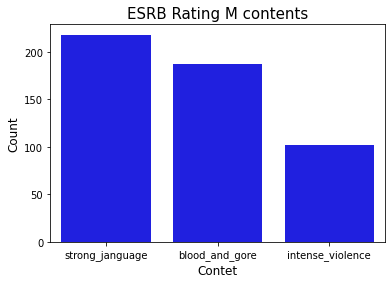

In [14]:
tmp = df.groupby('esrb_rating' ).sum()
tmp.drop(['console'] , axis = 1 , inplace=True)
tmp = tmp.drop('blood' , axis =1).T.sort_values('M' ,ascending=False).head(3)
sns.barplot(data = tmp , x = tmp.index , y = 'M' , color= 'blue')
plt.title('ESRB Rating M contents' , size = 15)
plt.xlabel("Contet" , size = 12)
plt.ylabel('Count' , size= 12)

Text(0, 0.5, 'Count')

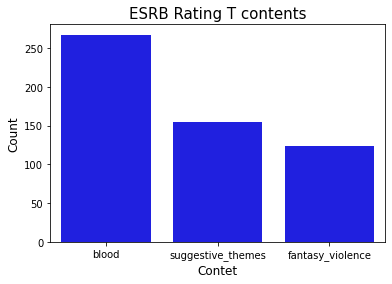

In [15]:
tmp = df.groupby('esrb_rating' ).sum()
tmp.drop(['console'] , axis = 1 , inplace=True)
tmp = tmp.T.sort_values('T' ,ascending=False).head(3)
sns.barplot(data = tmp , x = tmp.index , y = 'T' , color= 'blue')
plt.title('ESRB Rating T contents' , size = 15)
plt.xlabel("Contet" , size = 12)
plt.ylabel('Count' , size= 12)

Text(0, 0.5, 'Count')

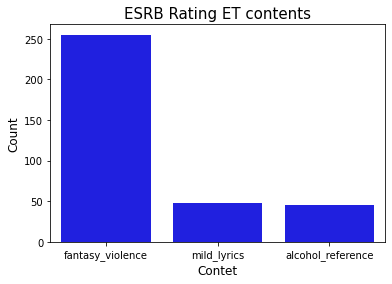

In [16]:
tmp = df.groupby('esrb_rating' ).sum()
tmp.drop(['console'] , axis = 1 , inplace=True)
tmp = tmp.T.sort_values('ET' ,ascending=False).head(3)
sns.barplot(data = tmp , x = tmp.index , y = 'ET' , color= 'blue')
plt.title('ESRB Rating ET contents' , size = 15)
plt.xlabel("Contet" , size = 12)
plt.ylabel('Count' , size= 12)

Text(0, 0.5, 'Count')

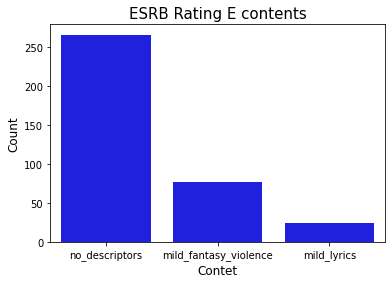

In [17]:
tmp = df.groupby('esrb_rating' ).sum()
tmp.drop(['console'] , axis = 1 , inplace=True)
tmp = tmp.T.sort_values('E' ,ascending=False).head(3)
sns.barplot(data = tmp , x = tmp.index , y = 'E' , color= 'blue')
plt.title('ESRB Rating E contents' , size = 15)
plt.xlabel("Contet" , size = 12)
plt.ylabel('Count' , size= 12)

## Heatmap

<AxesSubplot:>

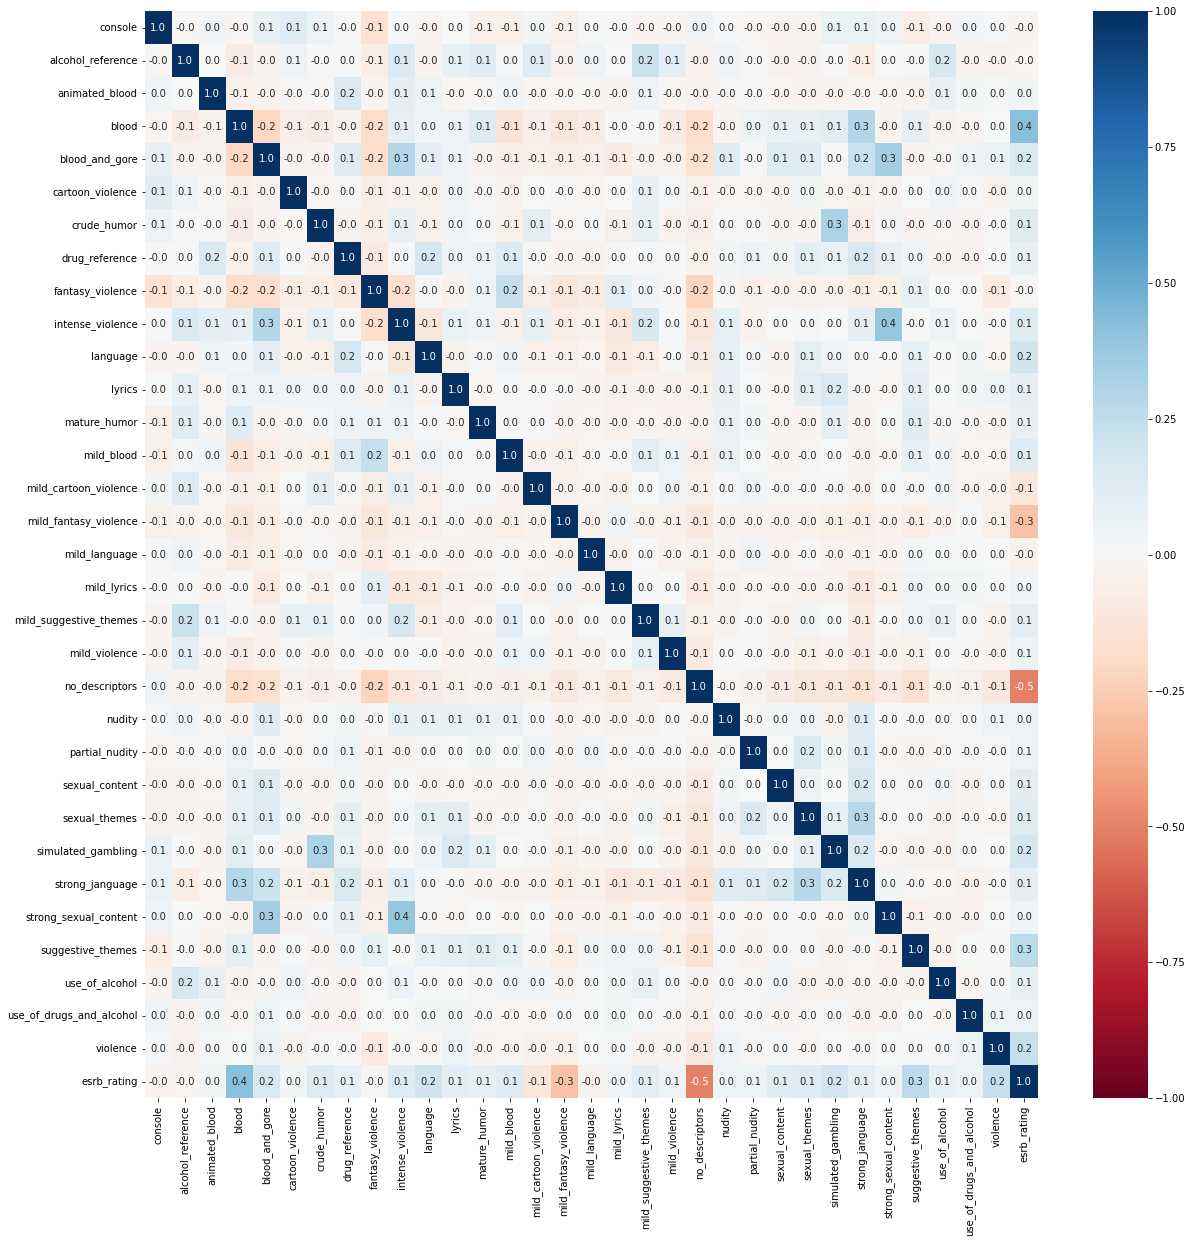

In [18]:
data = df.copy()
data = ce.OrdinalEncoder(cols='esrb_rating').fit_transform(data)
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='RdBu',annot=True,fmt=".1f",vmin=-1, vmax=1)

## Decision Tree Algorithm

In [24]:
X = df.drop('esrb_rating',axis=1)
y = df['esrb_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
DT = DecisionTreeClassifier()
t0  = time.time()
DT.fit(X_train,y_train)
dtTime = time.time() - t0
prediction = DT.predict(X_test)
print(classification_report(y_test,prediction))
dtAcurracy = score=accuracy_score(y_test,prediction)

              precision    recall  f1-score   support

           E       0.96      0.97      0.97       130
          ET       0.73      0.78      0.75       109
           M       0.82      0.86      0.84       120
           T       0.81      0.76      0.78       210

    accuracy                           0.83       569
   macro avg       0.83      0.84      0.84       569
weighted avg       0.83      0.83      0.83       569



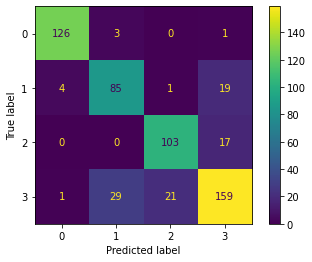

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test,prediction)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
display.plot()
plt.show()

## Random Forest Algorithm

In [27]:
rfc = RandomForestClassifier(n_estimators=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
t0 = time.time()
rfc.fit(X_train, y_train)
rfcTime = time.time() - t0
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
rfcAcurracy = score=accuracy_score(y_test,rfc_pred)

              precision    recall  f1-score   support

           E       0.94      0.97      0.95       130
          ET       0.76      0.78      0.77       109
           M       0.91      0.89      0.90       120
           T       0.84      0.82      0.83       210

    accuracy                           0.86       569
   macro avg       0.86      0.87      0.86       569
weighted avg       0.86      0.86      0.86       569



C:\Users\96650\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


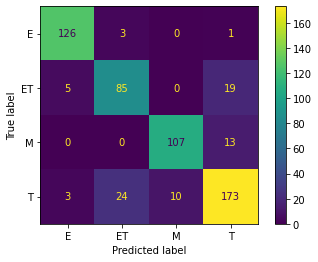

In [28]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

## k-nearest neighbors model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
t0  = time.time()
knn.fit(X_train,y_train)
knnTime = time.time() - t0
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
knnAcurracy = score=accuracy_score(y_test,pred)

              precision    recall  f1-score   support

           E       0.83      0.98      0.90       130
          ET       0.69      0.75      0.72       109
           M       0.92      0.84      0.88       120
           T       0.83      0.73      0.78       210

    accuracy                           0.82       569
   macro avg       0.82      0.83      0.82       569
weighted avg       0.82      0.82      0.82       569



## Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
clf =  MultinomialNB()
t0 = time.time()
clf.fit(X_train,y_train)
clfTime = time.time() - t0
predic =clf.predict(X_test)
print(classification_report(y_test,predic))
clfAcurracy = score=accuracy_score(y_test,predic)

              precision    recall  f1-score   support

           E       0.95      0.93      0.94       130
          ET       0.64      0.79      0.71       109
           M       0.88      0.89      0.89       120
           T       0.82      0.73      0.78       210

    accuracy                           0.82       569
   macro avg       0.83      0.84      0.83       569
weighted avg       0.83      0.82      0.82       569



## Comparison between Random Forest and Decision tree

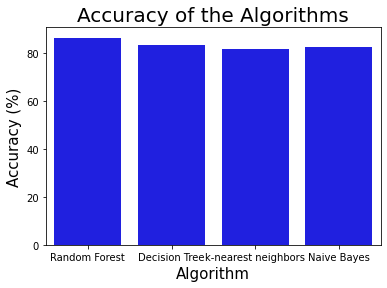

In [35]:
sns.barplot(x = ['Random Forest' , 'Decision Tree','k-nearest neighbors','Naive Bayes'] , y=[rfcAcurracy*100, dtAcurracy*100 ,knnAcurracy*100,clfAcurracy*100]  ,color='blue' )
plt.xlabel('Algorithm' , size = 15)
plt.ylabel('Accuracy (%)' , size = 15)
plt.title('Accuracy of the Algorithms' , size = 20)
plt.show()

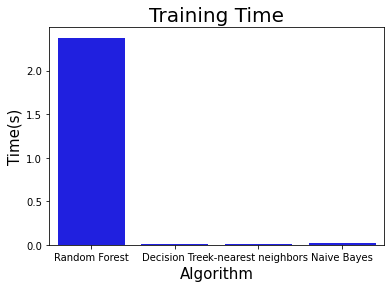

In [36]:
sns.barplot(x = ['Random Forest' , 'Decision Tree','k-nearest neighbors','Naive Bayes'] , y=[rfcTime , dtTime,knnTime,clfTime] , color='blue')
plt.xlabel('Algorithm' , size = 15)
plt.ylabel('Time(s)' , size = 15)
plt.title('Training Time' , size = 20 )
plt.show()